# Problem 220: Heighway Dragon

<p>Let <b><i>D</i></b><sub>0</sub> be the two-letter string "Fa".  For n≥1, derive <b><i>D</i></b><sub>n</sub> from <b><i>D</i></b><sub>n-1</sub> by the string-rewriting rules:</p>

<p style="margin-left:40px;">"a" → "aRbFR"<br />
"b" → "LFaLb"</p>

<p>Thus, <b><i>D</i></b><sub>0</sub> = "Fa", <b><i>D</i></b><sub>1</sub> = "FaRbFR", <b><i>D</i></b><sub>2</sub> = "FaRbFRRLFaLbFR", and so on.</p>

<p>These strings can be interpreted as instructions to a computer graphics program, with "F" meaning "draw forward one unit", "L" meaning "turn left 90 degrees", "R" meaning "turn right 90 degrees", and "a" and "b" being ignored.  The initial position of the computer cursor is (0,0), pointing up towards (0,1).</p>

<p>Then <b><i>D</i></b><sub>n</sub> is an exotic drawing known as the <i>Heighway Dragon</i> of order <i>n</i>.  For example, <b><i>D</i></b><sub>10</sub> is shown below; counting each "F" as one step, the highlighted spot at (18,16) is the position reached after 500 steps.</p>

<div class="center">
<img src="./p220.gif" class="dark_img" alt="" /></div>

<p>What is the position of the cursor after 10<sup>12</sup> steps in <b><i>D</i></b><sub>50</sub> ?<br />
Give your answer in the form <i>x</i>,<i>y</i> with no spaces.</p>


In [139]:
# functions for going forward and turning left/right

from typing import Tuple


def F(direction: int) -> Tuple[int, int]:
    if direction == 0:
        return (0, 1)
    if direction == 1:
        return (1, 0)
    if direction == 2:
        return (0, -1)
    if direction == 3:
        return (-1, 0)


def R(direction: int) -> int:
    return (direction + 1) % 4


def L(direction: int) -> int:
    return (direction - 1) % 4

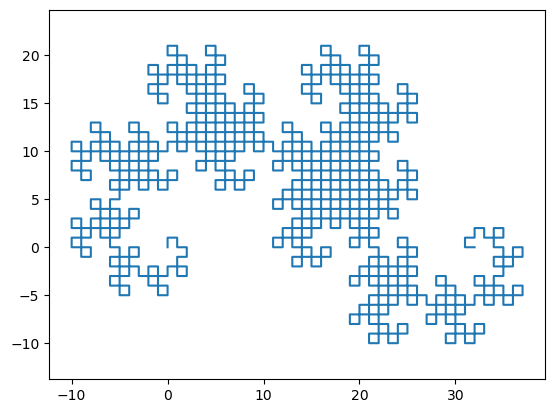

In [140]:
from functools import cache
from typing import List

import numpy as np
import matplotlib.pyplot as plt


@cache
def a_seq(d: int, dir: int = 0) -> Tuple[List[int], List[int], int]:
    if d == 0:
        return ([], [], dir)
    dx1, dy1, dir = a_seq(d - 1, dir)
    dir = R(dir)
    dx2, dy2, dir = b_seq(d - 1, dir)
    dx3, dy3 = F(dir)
    dir = R(dir)
    return dx1 + dx2 + [dx3], dy1 + dy2 + [dy3], dir


@cache
def b_seq(d: int, dir: int = 0) -> Tuple[List[int], List[int], int]:
    if d == 0:
        return ([], [], dir)
    dir = L(dir)
    dx1, dy1 = F(dir)
    dx2, dy2, dir = a_seq(d - 1, dir)
    dir = L(dir)
    dx3, dy3, dir = b_seq(d - 1, dir)
    return [dx1] + dx2 + dx3, [dy1] + dy2 + dy3, dir


def D_seq(d: int):
    dx, dy, _ = a_seq(10)
    dx = [0, 0] + dx
    dy = [0, 1] + dy
    return np.cumsum(dx), np.cumsum(dy)


x, y = D_seq(10)

plt.plot(x, y)
plt.axis("equal")

In [156]:
from functools import cache
from math import ceil, log2
from typing import Tuple


@cache
def a(d: int, dir: int = 0) -> Tuple[int, int, int]:
    if d == 0:
        return (0, 0, dir)
    dx1, dy1, dir = a(d - 1, dir)
    dir = R(dir)
    dx2, dy2, dir = b(d - 1, dir)
    dx3, dy3 = F(dir)
    dir = R(dir)
    return dx1 + dx2 + dx3, dy1 + dy2 + dy3, dir


@cache
def b(d: int, dir: int = 0) -> Tuple[int, int, int, int]:
    if d == 0:
        return (0, 0, dir)
    dir = L(dir)
    dx1, dy1 = F(dir)
    dx2, dy2, dir = a(d - 1, dir)
    dir = L(dir)
    dx3, dy3, dir = b(d - 1, dir)
    return dx1 + dx2 + dx3, dy1 + dy2 + dy3, dir


@cache
def D(d: int, number: int):
    if number == 1:
        dx, dy, _ = a(d)
        return dx, dy + 1
    elif number > 1:
        n2 = 2 ** (ceil(log2(number)) - 1)
        dx, dy = D(d, n2 - (number - n2) + 1)
        return dy, -dx

In [163]:
from typing import List


def powers_of_two(n: int) -> List[int]:
    powers = []
    power = 0
    while n > 0:
        if n % 2 == 1:
            powers.append(power)
        n //= 2
        power += 1
    return powers[::-1]


powers_of_two(10**12)

[39, 38, 37, 35, 31, 30, 28, 26, 23, 21, 18, 16, 12]

In [165]:
niter = 10**12

steps = 0
x, y = 0, 0
for power in powers_of_two(niter):
    dx, dy = D(power, steps // 2**power + 1)
    steps += 2**power
    x += dx
    y += dy

print(f"{x},{y}")

139776,963904
